# Load dataset 

In [57]:
# load packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
from sklearn.model_selection import train_test_split
# import TensorDataset
from torch.utils.data import TensorDataset

In [58]:
# load dataset.csv

dataset = pd.read_csv('dataset.csv')
dataset.head()

# remove first row

dataset = dataset.iloc[1:]


# first column is Plant height (cm) for Ss, second column is Plant height (cm) for Sc and third is for Sv
# the fourth, 5th and 6th are for Inflorescence height (mm) (the name of the 1st row of column 4 is Inflorescence height (mm))
# 7th and 8th are for Pedicel Length (mm)
# 9th and 10th are for Capitulum Length (mm) 
# 11th and 12th are for 

# create numpy array for each column

# create zero arary for 16 datapoints across 20 samples

data = np.zeros((60, 16))
# first 20 rows is for Ss, next 20 for Sc, next 20 for Sv

species = ["Ss", "Sc", "Sv"]
# predictors Plant height (cm)	Inflorescence height (mm)	Pedicel Length (mm)	Capitulum Length (mm)	Capitulum Width (mm)	Number of Ray Florets	Length of Ray Florest (mm)	Width of Ray Florets (mm)	Longest leaf length (cm)	Midleaf length (cm)	Number of midleaf lobes	Leaf dissection	Standardized leaf perimeter	Seed length (mm)	Total number of seeds 	Pollen pore size (uM)

predictors = ["Plant height (cm)", "Inflorescence height (mm)", "Pedicel Length (mm)", "Capitulum Length (mm)", "Capitulum Width (mm)", "Number of Ray Florets", "Length of Ray Florest (mm)", "Width of Ray Florets (mm)", "Longest leaf length (cm)", "Midleaf length (cm)", "Number of midleaf lobes", "Leaf dissection", "Standardized leaf perimeter", "Seed length (mm)", "Total number of seeds", "Pollen pore size (uM)"]

# column 1, 2 and 3 are for first 20, second 20 and third 20 of the fist column of the dataset
data[0:20, 0] = dataset.iloc[0:20, 0].values
data[20:40, 0] = dataset.iloc[0:20, 1].values
data[40:60, 0] = dataset.iloc[0:20, 2].values
data[0:20, 1] = dataset.iloc[0:20, 3].values
data[20:40, 1] = dataset.iloc[0:20, 4].values
data[40:60, 1] = dataset.iloc[0:20, 5].values
data[0:20, 2] = dataset.iloc[0:20, 6].values
data[20:40, 2] = dataset.iloc[0:20, 7].values
data[40:60, 2] = dataset.iloc[0:20, 8].values
data[0:20, 3] = dataset.iloc[0:20, 9].values
data[20:40, 3] = dataset.iloc[0:20, 10].values
data[40:60, 3] = dataset.iloc[0:20, 11].values
data[0:20, 4] = dataset.iloc[0:20, 12].values
data[20:40, 4] = dataset.iloc[0:20, 13].values
data[40:60, 4] = dataset.iloc[0:20, 14].values
data[0:20, 5] = dataset.iloc[0:20, 15].values
data[20:40, 5] = dataset.iloc[0:20, 16].values
data[40:60, 5] = dataset.iloc[0:20, 17].values
data[0:20, 6] = dataset.iloc[0:20, 18].values
data[20:40, 6] = dataset.iloc[0:20, 19].values
data[40:60, 6] = dataset.iloc[0:20, 20].values
data[0:20, 7] = dataset.iloc[0:20, 21].values
data[20:40, 7] = dataset.iloc[0:20, 22].values
data[40:60, 7] = dataset.iloc[0:20, 23].values
data[0:20, 8] = dataset.iloc[0:20, 24].values
data[20:40, 8] = dataset.iloc[0:20, 25].values
data[40:60, 8] = dataset.iloc[0:20, 26].values
data[0:20, 9] = dataset.iloc[0:20, 27].values
data[20:40, 9] = dataset.iloc[0:20, 28].values
data[40:60, 9] = dataset.iloc[0:20, 29].values
data[0:20, 10] = dataset.iloc[0:20, 30].values
data[20:40, 10] = dataset.iloc[0:20, 31].values
data[40:60, 10] = dataset.iloc[0:20, 32].values
data[0:20, 11] = dataset.iloc[0:20, 33].values
data[20:40, 11] = dataset.iloc[0:20, 34].values
data[40:60, 11] = dataset.iloc[0:20, 35].values
data[0:20, 12] = dataset.iloc[0:20, 36].values
data[20:40, 12] = dataset.iloc[0:20, 37].values
data[40:60, 12] = dataset.iloc[0:20, 38].values
data[0:20, 13] = dataset.iloc[0:20, 39].values
data[20:40, 13] = dataset.iloc[0:20, 40].values
data[40:60, 13] = dataset.iloc[0:20, 41].values
data[0:20, 14] = dataset.iloc[0:20, 42].values
data[20:40, 14] = dataset.iloc[0:20, 43].values
data[40:60, 14] = dataset.iloc[0:20, 44].values
data[0:20, 15] = dataset.iloc[0:20, 45].values
data[20:40, 15] = dataset.iloc[0:20, 46].values
data[40:60, 15] = dataset.iloc[0:20, 47].values

# print first 5 rows of data and the headers

print(data[0:5, :])

[[23.48 18.99  9.02  7.2   3.39  0.    0.    0.   15.85  8.59  9.41  5.85
   2.34  2.42 55.4   8.15]
 [20.94 18.82  9.17  7.23  3.21  0.    0.    0.   11.12  7.59 11.42  7.21
   2.32  2.46 59.34  8.97]
 [22.28 18.65  8.6   7.25  3.09  0.    0.    0.    6.45 10.34 11.2   5.3
   2.2   2.37 59.91  8.41]
 [26.24 18.77  8.56  7.23  3.09  0.    0.    0.   11.85 10.5  12.35  5.34
   2.26  2.41 43.25  8.28]
 [12.05 19.29  8.83  7.33  3.19  0.    0.    0.    8.17  9.21 12.03  7.17
   2.37  2.47 72.27  8.27]]


<AxesSubplot: >

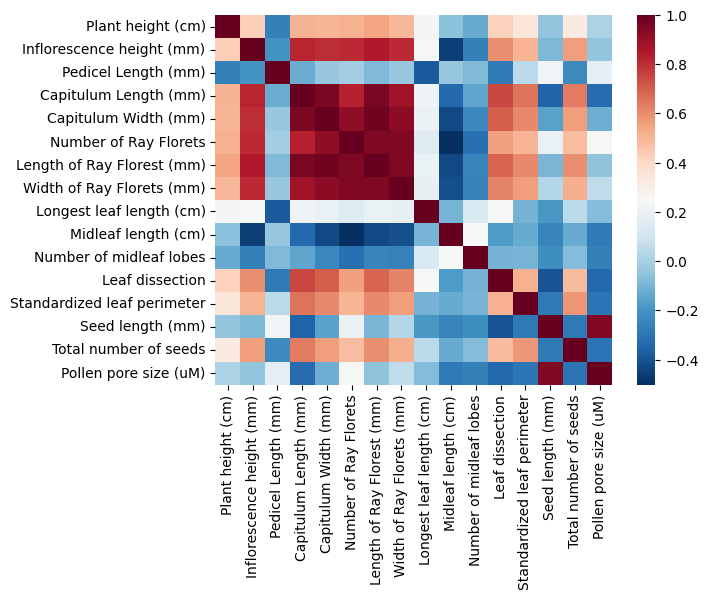

In [59]:
# create numpy array for the response variable

# create zero arary for 60 datapoints across 1 sample

response = np.zeros((60, 1))

# first 20 rows is for Ss, next 20 for Sc, next 20 for Sv

response[0:20, 0] = 0

response[20:40, 0] = 1

response[40:60, 0] = 2


# create a dataframe from the data

df = pd.DataFrame(data, columns=predictors)


# create a dataframe from the response

df_response = pd.DataFrame(response, columns=["Species"])

# create a dataframe with both data and response

df_full = pd.concat([df, df_response], axis=1)

# create a correlation matrix, without the species column

corr = df.corr()

# create a heatmap for the correlation matrix, red is high correlation, blue is low correlation

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="RdBu_r")

In [60]:
# generate sequential model with 16 nodes in the first hidden layer, 8 nodes in the second hidden layer, and 3 nodes in the output layer using pytorch

model = nn.Sequential()

model.add_module("hidden1", nn.Linear(16, 16))

model.add_module("relu1", nn.ReLU())

model.add_module("output", nn.Linear(16, 3))

# define the loss function

loss_fn = nn.CrossEntropyLoss()

# define the optimizer

optimizer = optim.Adam(model.parameters(), lr=0.01)

In [61]:
# convert the data to tensors

X = torch.tensor(data, dtype=torch.float32)

y = torch.tensor(response, dtype=torch.long)

# create a dataset from the tensors, using pytorch

dataset = TensorDataset(X, y)

# create a dataloader from the dataset

dataloader = DataLoader(dataset, batch_size=60, shuffle=True)

In [62]:
# train the model
epochs = 100000
loss_list = np.zeros(epochs)
accuracy_list = np.zeros(epochs)

for epoch in range(epochs):
    y_pred = model(X)
    loss = loss_fn(y_pred, y.squeeze())
    loss_list[epoch] = loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    accuracy = (y_pred.argmax(1) == y.squeeze()).float().mean()
    accuracy_list[epoch] = accuracy.item()
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss {loss.item()}, Accuracy {accuracy.item()}")



Epoch 0, Loss 2.267969846725464, Accuracy 0.3333333432674408
Epoch 100, Loss 0.015906335785984993, Accuracy 1.0
Epoch 200, Loss 0.004495210945606232, Accuracy 1.0
Epoch 300, Loss 0.002165878424420953, Accuracy 1.0
Epoch 400, Loss 0.0012879280839115381, Accuracy 1.0
Epoch 500, Loss 0.0008583730668760836, Accuracy 1.0
Epoch 600, Loss 0.0006147967069409788, Accuracy 1.0
Epoch 700, Loss 0.0004626619047485292, Accuracy 1.0
Epoch 800, Loss 0.00036096491385251284, Accuracy 1.0
Epoch 900, Loss 0.00028940182528458536, Accuracy 1.0
